# Example Karstolution run


In [1]:
from __future__ import print_function, division, unicode_literals
import yaml
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# import seaborn if it's available
try:
    import seaborn as sns
    
except ImportError:
    pass # no big deal otherwise

In [4]:
# this lets us use karstolution without installing it
import sys
import os
sys.path.append(os.path.abspath('..'))

In [5]:
from Karstolution import karstolution

## Static configuration

The configuration is passed to the main model routine as a `dict`, i.e. a Python dictionary.
A convenient way of soring the configuration is as a [yaml](http://yaml.org/) formatted file.
Here's an example (the Texas case):

```yaml
f1 : 0.2
f3 : 0.008
f4 : 0.0
f5 : 0.005
f6 : 0.002
f7 : 1.0
k_diffuse : 0.008
f8 : 0.001
i : 0.5
j : 0.25
k : 0.25
m : 0.75
n : 0.25
k_eevap : 0.0
k_d18o_soil : 0.03
k_d18o_epi : 0.0
soilstore : 200.0
epicap : 400.0
ovicap : 100.0
epikarst : 400.0
ks1 : 400.0
ks2 : 200.0
lambda_weibull : 1.5
k_weibull : 1.0
mixing_parameter_phi : 1.0
# these parameters are forced by a climatological monthly mean
# (so there needs to be a list of 12 values, January-December)
monthly_forcing : 
  drip_pco2 : [4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0]
  cave_pco2 : [1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0]
  rel_humidity : [0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95]
  ventilation : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  cave_temp : [10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0]
  drip_interval : [100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0]
  driprate_store_empty : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  driprate_store_full :  [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
initial_conditions :
  # initial level in each store
  soil : 50.0
  epikarst : 100.0
  ks1 : 230.0
  ks2 : 50.0
  diffuse : 30.0
  # initial oxygen-18 composition in each store (d18O, permille VSMOW)
  d18o_soil : -5.0
  d18o_epikarst : -4.0
  d18o_ks1 : -5.0
  d18o_ks2 : -4.0
  d18o_prevrain : -5.0
  d18o_diffuse : -4.0
```

In [6]:
# Make changes to parameters here

yaml_config = """
f1 : 0.2
f3 : 0.008
f4 : 0.0
f5 : 0.005
f6 : 0.002
f7 : 1.0
k_diffuse : 0.008
f8 : 0.001
i : 0.5
j : 0.25
k : 0.25
m : 0.75
n : 0.25
k_eevap : 0.0
k_d18o_soil : 0.03
k_d18o_epi : 0.0
soilstore : 200.0
epicap : 400.0
ovicap : 100.0
epikarst : 400.0
ks1 : 400.0
ks2 : 200.0
lambda_weibull : 1.5
k_weibull : 1.0
mixing_parameter_phi : 1.0
monthly_forcing : 
  # these parameters are forced with a climatological mean
  drip_pco2 : [4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0]
  cave_pco2 : [1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0]
  rel_humidity : [0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95]
  ventilation : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  cave_temp : [10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0]
  drip_interval : [100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0]
  driprate_store_empty : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
  driprate_store_full :  [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
initial_conditions :
  # initial level in each store
  soil : 50.0
  epikarst : 100.0
  ks1 : 230.0
  ks2 : 50.0
  diffuse : 30.0
  # initial oxygen-18 composition in each store (d18O, permille VSMOW)
  d18o_soil : -5.0
  d18o_epikarst : -4.0
  d18o_ks1 : -5.0
  d18o_ks2 : -4.0
  d18o_prevrain : -5.0
  d18o_diffuse : -4.0"""

In [7]:
config=yaml.safe_load(yaml_config)

## Time-varying input

The time-varying inputs (with a monthly timestep) are passed to the model as a pandas.DataFrame.  Load one from a csv file...

In [8]:
df_input = pd.read_csv('../example/input.csv')

In [9]:
df_input.head()

,tt,mm,evpt,prp,tempp,d18o
0,1,1,63.878443,15.236226,19.649749,-3.400600
1,2,2,33.334600,14.741009,17.888605,-2.826333
2,3,3,18.893370,17.004427,15.940097,-3.625750
3,4,4,44.527913,43.030678,14.215880,-4.285571
4,5,5,40.456649,65.882121,12.940891,-4.630999


Text(0.5,1,'Model forcing')

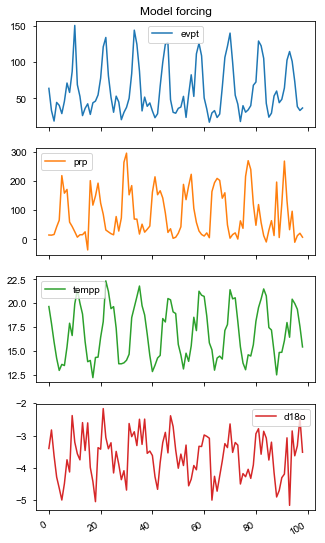

In [10]:
ax = df_input.drop(['tt','mm'], axis=1).plot(subplots=True)
ax[0].figure.set_size_inches([5,10])
ax[0].set_title('Model forcing')

In [11]:
model_output = karstolution(config, df_input, calculate_drip=True)

In [12]:
# aside: check that the model output matches the old version
# -- this comparison looks good (there were some problems, but all good now)
df_ref = pd.read_csv('../example/output.csv')
# difference between current run and a reference
(model_output - df_ref).abs().max(axis=0)/df_ref.mean(axis=0).abs()

cave_temp            5.760135e-16
dpdf[0]              2.727537e-03
drip_int_stal1       9.997260e-01
drip_int_stal2       5.737997e-02
drip_int_stal3       5.480901e-02
drip_int_stal4       7.442308e-03
drip_int_stal5       4.996687e-02
epx18o               5.770743e-01
epxstor              2.836404e-03
f1                   6.328514e-16
f3                   2.727537e-03
f4                   4.010484e+00
f5                   8.320418e-02
f6                   6.513720e-01
f7                   4.337278e+00
kststor1             4.905191e-02
kststor118o          3.605621e-01
kststor2             6.513720e-01
kststor218o          4.798464e-01
mm                   0.000000e+00
soil18o              1.829940e+00
soilstor             6.328514e-16
stal1_growth_rate             NaN
stal1d18o            8.298095e-01
stal2_growth_rate             NaN
stal2d18o            2.920184e-01
stal3_growth_rate             NaN
stal3d18o            4.376102e-01
stal4_growth_rate             NaN
stal4d18o     

## Plot results

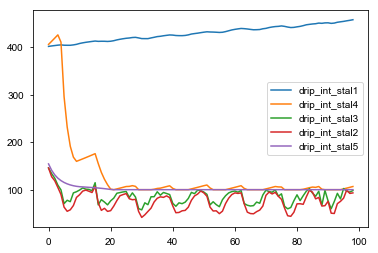

In [13]:
drip_cols = [itm for itm in model_output.columns if itm.startswith('drip')]
model_output[drip_cols].plot()

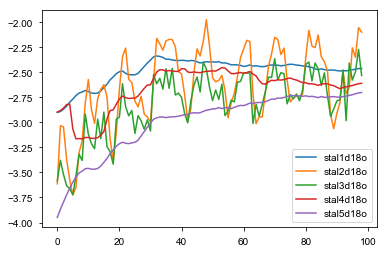

In [14]:
stal_cols = [itm for itm in model_output.columns if itm.startswith('stal') and '18o' in itm]
model_output[stal_cols].plot()

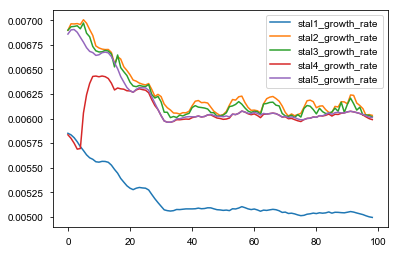

In [15]:
stal_cols = [itm for itm in model_output.columns if itm.startswith('stal') and 'growth_rate' in itm]
model_output[stal_cols].plot()

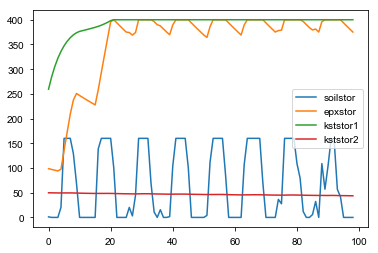

In [16]:
store_cols = ['soilstor', 'epxstor', 'kststor1','kststor2']
model_output[store_cols].plot()